In [77]:
import numpy as np
import matplotlib.pyplot as plt
from RK4 import *

In [78]:
#Constants [L] = AU, [T] = years, [M] = solar mass 
G = 1.; M = 1.; c = 1.;
Rs = 2*G*M/(c**2)

In [79]:
def f(t0, q0):
    t=q0[0]; r=q0[1]; theta=q0[2]; phi=q0[3]
    dt=q0[4]; dr=q0[5]; dtheta=q0[6]; dphi=q0[7]
    f = np.zeros(8)
    f[0] = dt
    f[1] = dr
    f[2] = dtheta
    f[3] = dphi    
    f[4] = -2*G*M*dr*dt/(r*(r-2*G*M))
    f[5] = -G*M*dt**2*(r-2*G*M)/(r**3)+G*M*dr**2/(r*(r-2*G*M))+(r-2*G*M)*(dtheta**2+(np.sin(theta)*dphi)**2)
    f[6] = -2*dtheta*dr/r+np.sin(theta)*np.cos(theta)*dphi**2
    f[7] = -2*(dphi*dr/r+np.cos(theta)*dtheta*dphi/np.sin(theta))
    return f

In [80]:
def eff_potential(r,epsilon,L):
    return (1 - 2*G*M/r)*(L**2/r**2 + epsilon)

In [89]:
T = 36*2*np.pi/np.sqrt(12) # GM/c^3
t0 = 0
tf = 50*T
n = 100000

t = np.linspace(t0,tf,n)
h = (tf - t0)/n
qs = 5
Q = np.zeros([n,qs,8])

In [117]:
L0 = np.array([np.sqrt(12)-0.1,np.sqrt(12),np.sqrt(12)+0.1,np.sqrt(12)+0.1,np.sqrt(12)+0.1]);
rmin = L0[2]**2*(1-np.sqrt(1-12/(L0[2]**2)))/2
rmax = L0[2]**2*(1+np.sqrt(1-12/(L0[2]**2)))/2
r0 = np.array([6,6,rmin,rmax,(rmin+rmax)/2])
#r0 = L0*(L0-np.sqrt(L0**2-12))/2
E0 = np.sqrt(eff_potential(r0,1.,L0))
dr0 = 0.
dt0 = E0/(1-2*G*M/r0); dphi0 = L0/(r0**2)
for i in range(qs):
    Q[0,i,0] = t0
    Q[0,i,1] = r0[i]
    Q[0,i,2] = np.pi*0.5
    Q[0,i,3] = 0.
    
    Q[0,i,4] = dt0[i]
    Q[0,i,5] = dr0
    Q[0,i,6] = 0.
    Q[0,i,7] = dphi0[i]

In [118]:
rmin,rmax

(4.857438919923835, 7.8453814031037155)

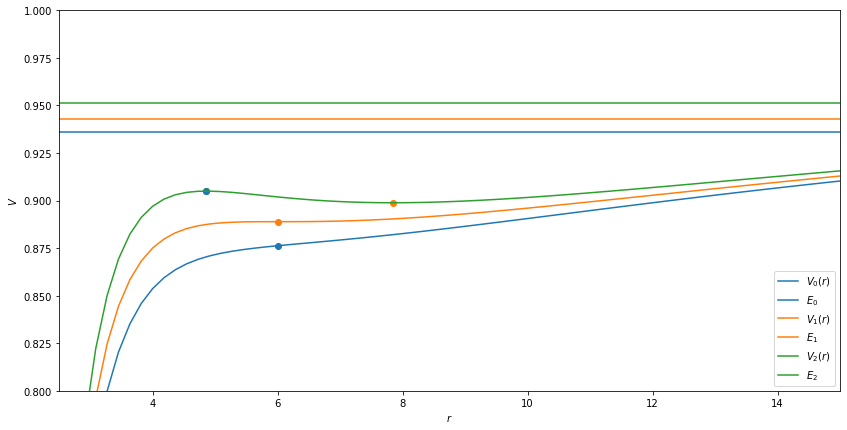

In [119]:
r = np.linspace(Rs,10*Rs,100)
#V = eff_potential(r,1.,L0)
plt.figure(figsize=(14,7))
#plt.plot(r,np.zeros(len(r)),color='black')
for i in range(3):
    plt.plot(r,eff_potential(r,1.,L0[i]),color = f'C{1*i}',label=f'$V_{i}(r)$')
    plt.plot(r,E0[i]*np.ones(len(r)),color = f'C{1*i}',label=f'$E_{i}$')
    plt.scatter(r0[i],eff_potential(r0[i],1.,L0[i]),color = f'C{1*i}',marker='o')
plt.scatter(rmin,eff_potential(rmin,1.,L0[2]),marker='o')
plt.scatter(rmax,eff_potential(rmax,1.,L0[2]),marker='o')
plt.xlim([2.5,15])
plt.ylim([0.8,1.])
plt.xlabel('$r$')
plt.ylabel('$V$')
plt.legend()
plt.show()

In [92]:
%%time
for i in range(1,n):
    for j in range(qs):
        q0 = Q[i-1,j]
        Q[i,j] = RK4(f, h, 0, q0)
            
    

/home/usuario/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
/home/usuario/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
/home/usuario/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in double_scalars
  if sys.path[0] == '':
/home/usuario/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in double_scalars
  if __name__ == '__main__':
/home/usuario/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':
/home/usuario/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars


CPU times: user 1min 28s, sys: 193 ms, total: 1min 28s
Wall time: 1min 28s


/home/usuario/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


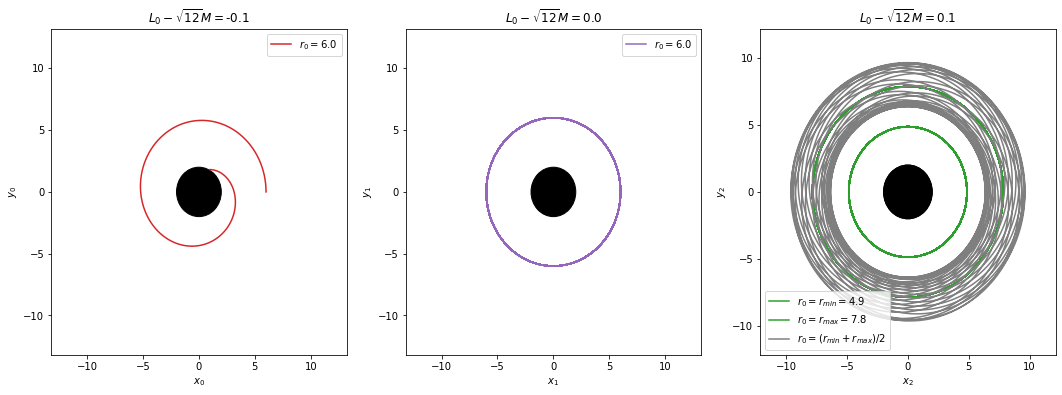

In [186]:
tc=np.array([1545,n,n,n,n])
fig, ax = plt.subplots(1,3,figsize=(18,6))
for i in range(3):
    x = Q[0:tc[i],i,1]*np.cos(Q[0:tc[i],i,3])*np.sin(Q[0:tc[i],i,2])
    y = Q[0:tc[i],i,1]*np.sin(Q[0:tc[i],i,3])*np.sin(Q[0:tc[i],i,2])
    if i < 2:
        ax[i].plot(x, y, color=f'C{(i+1)%3+2}', label = f'$r_0 = {r0[i]:.1f}$')
    else:
        ax[i].plot(x, y, color=f'C{(i+1)%3+2}', label = r'$r_0 = r_{min} =$'+f'{r0[i]:.1f}')
    ax[i].set_title(r'$L_0-\sqrt{12}M=$'+f'{L0[i]-np.sqrt(12):.1f}')
    ax[i].set_xlabel(f'$x_{i}$')
    ax[i].set_ylabel(f'$y_{i}$')
    blackHole = plt.Circle((0, 0), Rs, color='k')
    ax[i].add_patch(blackHole)
    ax[i].set_xlim([-r0[i]*2.2,r0[i]*2.2])
    ax[i].set_ylim([-r0[i]*2.2,r0[i]*2.2])
    if i < 2:
        ax[i].legend()
    
x = Q[0:tc[3],3,1]*np.cos(Q[0:tc[3],3,3])*np.sin(Q[0:tc[3],3,2])
y = Q[0:tc[3],3,1]*np.sin(Q[0:tc[3],3,3])*np.sin(Q[0:tc[3],3,2])
ax[2].plot(x, y, color=f'C2',label=r'$r_0=r_{max}=$'+f'{r0[3]:.1f}')
x = Q[0:tc[4],4,1]*np.cos(Q[0:tc[4],4,3])*np.sin(Q[0:tc[4],4,2])
y = Q[0:tc[4],4,1]*np.sin(Q[0:tc[4],4,3])*np.sin(Q[0:tc[4],4,2])
ax[2].plot(x, y, color=f'C7',label=r'$r_0=(r_{min}+r_{max})/2$')
ax[2].legend()
blackHole = plt.Circle((0, 0), Rs, color='k')
ax[2].add_patch(blackHole)
rmin_circle = plt.Circle((0, 0), r0[4], color='blue',fill = False)
#rmax_circle = plt.Circle((0, 0), rmax, color='blue',fill = False)
ax[2].add_patch(rmin_circle)
ax[2].set_xlim([-r0[i]*2.5,r0[i]*2.5])
ax[2].set_ylim([-r0[i]*2.5,r0[i]*2.5])
#ax[2].add_patch(rmax_circle)
plt.savefig('ISCO_stable_orbits.png')
plt.show()

TypeError: only integer scalar arrays can be converted to a scalar index

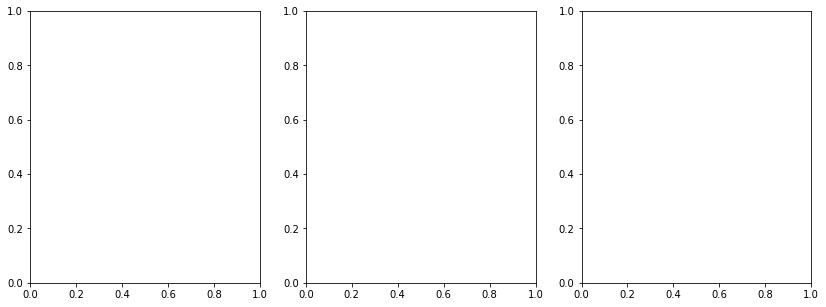

In [10]:
fig,ax = plt.subplots(1,2, figsize=(14,5))
energy = Q[0:tc,4]/(1-2/Q[0:tc,1])
ax[0].plot(t[0:tc], energy, color = 'crimson',label = r'$E(\tau)$')
ax[0].set_xlabel('$\tau$')
ax[0].set_ylabel('$E$')
ax[0].legend()
angular_momentum = Q[0:tc,7]*Q[0:tc,1]**2
ax[1].plot(Q[0:tc,0], angular_momentum, color = 'navy',label = r'$L(\tau)$')
ax[1].set_xlabel('$\tau$')
ax[1].set_ylabel('$L$')
ax[1].legend()

epsilon = Q[0:tc,4]*(1-2/Q[0:tc,1])-Q[0:tc,5]/(1-2/Q[0:tc,1])-(Q[0:tc,1]*np.sin(Q[0:tc,2])*Q[0:tc,7])**2
ax[2].plot(Q[0:tc,0], epsilon, color = 'mediumslateblue',label = r'$\epsilon$')
ax[2].set_xlabel('$\tau$')
ax[2].set_ylabel('$\epsilon$')
ax[2].legend()

plt.savefig('Energy_redshift.png')
plt.show()

In [ ]:
np.min(energy)

In [ ]:
np.max(angular_momentum) - np.min(angular_momentum)

In [ ]:
np.max(epsilon)-np.min(epsilon)

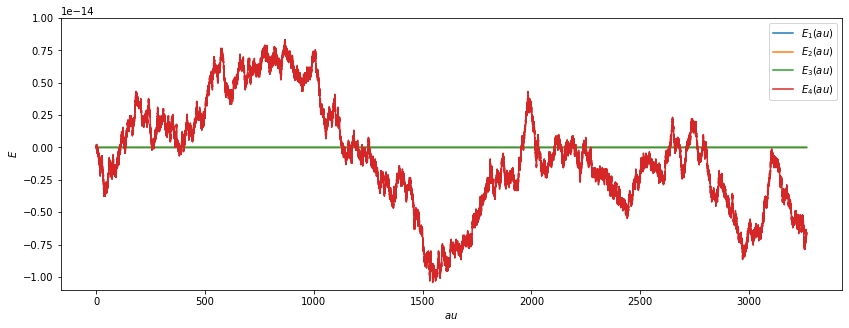

In [148]:
fig,ax = plt.subplots(1,1, figsize=(14,5))
for i in range(1,5):
    ax.plot(t, Q[:,i,4]*(1-2/Q[:,i,1]) - E0[i],label = f'$E_{i}(\tau)$')
#ax.plot(t,(rmin+rmax)*np.ones(n)/2)
#ax.plot(t,r0[4]*np.ones(n))
ax.set_ylim([-1.1e-14,1e-14])
ax.set_xlabel('$\tau$')
ax.set_ylabel('$E$')
ax.legend()

#ax[1].plot(Q[0:tc,0], Q[0:tc,7], color = 'red',label = r'$\phi(\tau)$')
#ax[1].set_xlabel('$\tau$')
#ax[1].set_ylabel('$\phi$')
#ax[1].legend()

plt.show()